<a href="https://colab.research.google.com/github/KlaidasKaralevicius/Deep_Learning_Project_2.1/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk4anYFFsY3OTqb6RP4oTBhqPM0P1u80tSRA&usqp=CAU" width=75 height=50>

*Algirdas Laukaitis*

<br><br>

---



# <font color='SeaGreen'>Download and prepare the CIFAR10 dataset</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/PICOL_Download.svg/1024px-PICOL_Download.svg.png" width=100 height=100>


In [ ]:
#@title Our adventure begins with the code that loads the CIFAR-10 dataset, a database featuring images of various objects from our world.

# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
# import matplotlib.pyplot as plt
# import numpy as np

# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
#import os


!git clone https://github.com/KlaidasKaralevicius/Deep_Learning_Project_2.1.git

train_dir = 'Deep_Learning_Project_2.1/afhq/train'
test_dir = 'Deep_Learning_Project_2.1/afhq/val'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(32, 32),
    batch_size=32,
    #label_mode='int',
    #class_names=['cat', 'dog', 'wild']
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(32, 32),
    batch_size=32,
    #label_mode='int',
    #class_names=['cat', 'dog', 'wild']
)

class_names = ['cat', 'dog', 'wild']

fatal: destination path 'Deep_Learning_Project_2.1' already exists and is not an empty directory.
Found 14630 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.


In [23]:
train_images = []
train_labels = []

for images, labels in train_dataset:
    train_images.append(images.numpy())
    train_labels.append(labels.numpy())

train_images = np.concatenate(train_images, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

test_images = []
test_labels = []

for images, labels in test_dataset:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

In [24]:
#@title Normalizing the pixel values is crucial, ensuring our data is ready for the challenges ahead

train_images, test_images = train_images / 255.0, test_images / 255.0

<br><br>

---
###<font color='SeaGreen'>Let's plot the first 100 images </font>


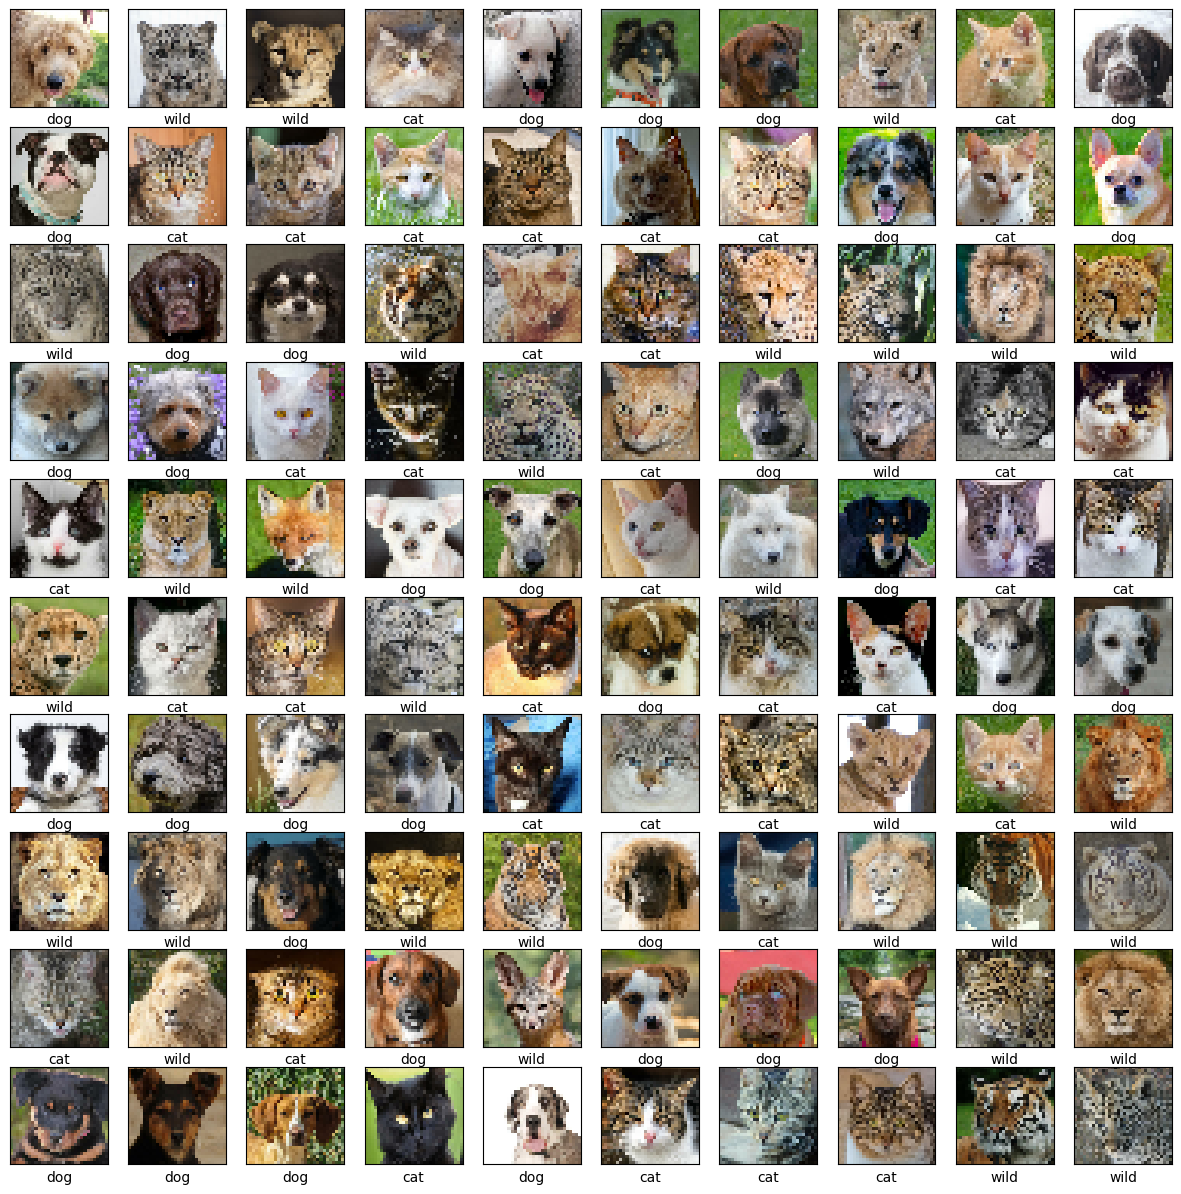

In [25]:
#@title  Let's navigate through a hundred images from CIFAR-10 to ensure our data is intact. It's essential to know what we're up against.
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()


<br><br><br><br>


# <font color='SeaGreen'>Convolutional Neural Network</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png" width=500 height=150>

<br><br>

---
###<font color='SeaGreen'>Step 2. Model </font>

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

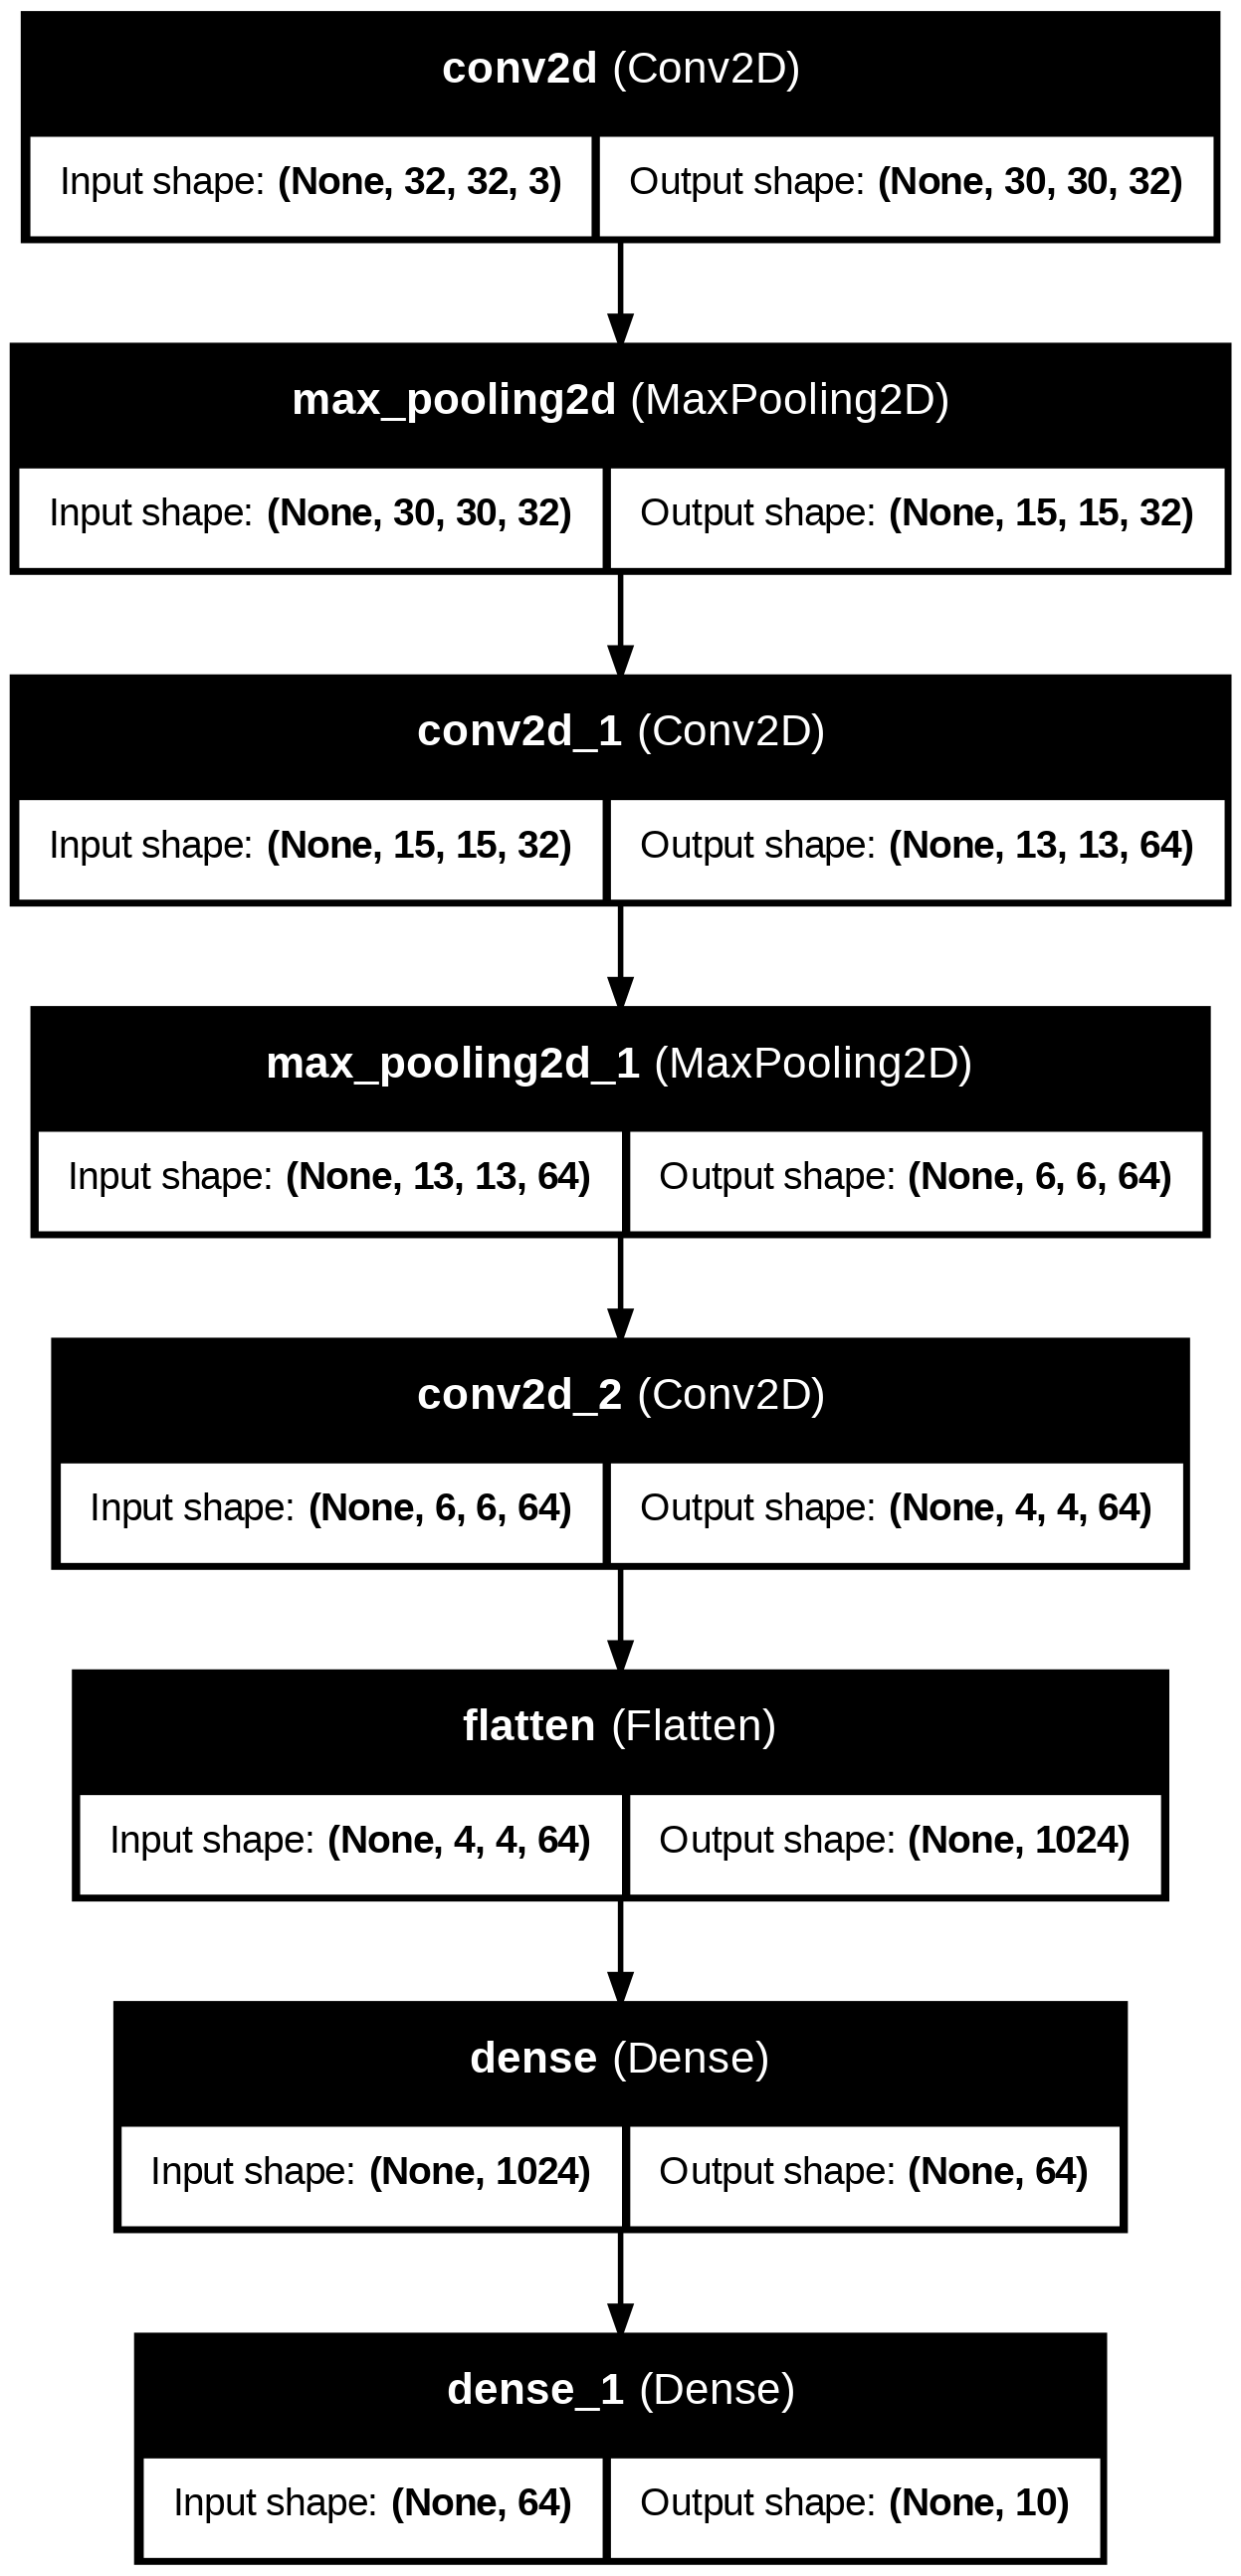

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

<br><br>

---
###<font color='SeaGreen'>Step 3. Train and evaluate the model</font>

In [28]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6099 - loss: 0.8399 - val_accuracy: 0.8993 - val_loss: 0.2628
Epoch 2/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9170 - loss: 0.2253 - val_accuracy: 0.9260 - val_loss: 0.2056
Epoch 3/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9466 - loss: 0.1510 - val_accuracy: 0.9433 - val_loss: 0.1588
Epoch 4/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9608 - loss: 0.1080 - val_accuracy: 0.9440 - val_loss: 0.1489
Epoch 5/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.0866 - val_accuracy: 0.9507 - val_loss: 0.1291


####<font color='SeaGreen'>Evaluate the model</font>

47/47 - 0s - 2ms/step - accuracy: 0.9507 - loss: 0.1291
0.9506666660308838


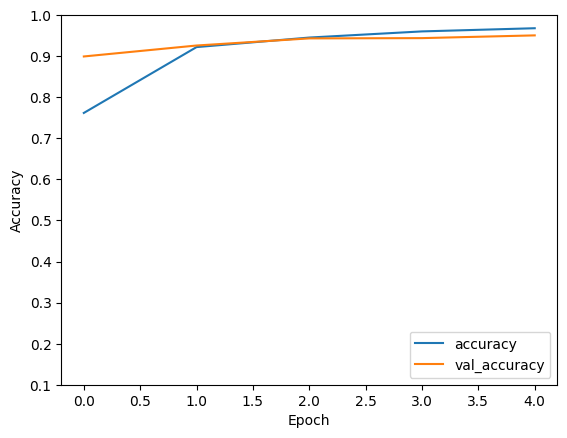

In [29]:
#@title Behold, the rise of Convolutional Neural Networks! By harnessing the power of convolutional layers, we achieve a remarkable 70% accuracy.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)


<br><br>

---
#<font color='SeaGreen'>Visualizing Filters and Feature Maps</font> <img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" width=200 height=200>









The simplest way to visualize learned filters in a neural network is to plot them as two-dimensional images. These filters, essentially weights, have a spatial relationship due to their two-dimensional structure. To view these filters, you can access the model's layers and identify convolutional layers with 'conv' in their names. Each convolutional layer has filter weights and bias values, which you can retrieve and examine. Typically, convolutional layers use 3x3 filters, and it's essential that the filter depth matches the input's channel depth. This process helps you understand the model's filter shapes and their compatibility with input channels.


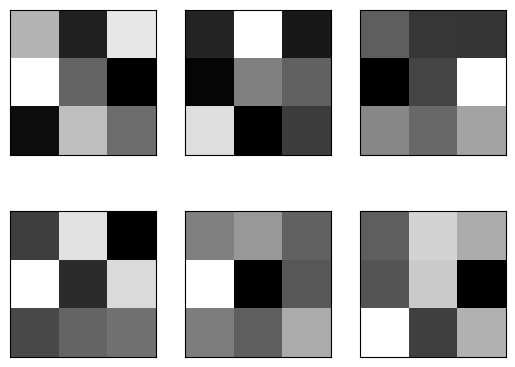

In [30]:
#@title Prepare yourselves for a mind-bending concept – multi-channel filters! These are the building blocks of our enhanced neural networks.

filters, biases = model.layers[0].get_weights()

ix = 1
for filter_i in range(2):
	f = filters[:, :, :, filter_i]
	for channel_j in range(3):  # plot each channel separately
		ax = plt.subplot(2, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, channel_j], cmap='gray')
		#print(f[:, :, channel_j])
		ix += 1
plt.show()

In [31]:
#@title  Let's delve into the world of filter outputs. We've constructed a model that will unveil the hidden patterns within our data.

model_layers_0 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)  # redefine model to output right after the first hidden layer

In [32]:

img = train_images[1]  # load the image
img = np.expand_dims(img, axis=0)  # expand dimensions so that it represents a single 'sample'


feature_maps = model_layers_0.predict(img)  # get feature map for first hidden layer

#plt.figure(figsize=(5, 5));plt.imshow(train_images[1]);plt.axis('off');plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


In [33]:
transposed_img = np.transpose(train_images[1] , (2, 0, 1))
np.set_printoptions(threshold=np.inf)
for row in transposed_img[0]:
    formatted_row = ["{:0.2f}".format(element) for element in row]
    print(" ".join(formatted_row))

0.89 0.93 0.94 0.92 0.96 0.97 0.96 0.97 0.98 0.97 0.96 0.98 0.99 0.97 0.99 0.99 0.96 0.98 0.98 0.96 0.98 0.99 0.98 0.99 0.99 0.98 0.96 0.98 0.98 0.96 0.98 0.98
0.90 0.93 0.94 0.91 0.96 0.96 0.96 0.97 0.99 0.99 0.96 0.98 0.98 0.96 0.99 0.99 0.97 0.99 0.99 0.96 0.98 0.98 0.98 0.99 0.99 0.98 0.98 0.99 0.97 0.97 0.98 0.96
0.91 0.95 0.96 0.93 0.96 0.96 0.96 0.96 0.99 0.99 0.97 0.99 0.99 0.96 0.98 0.99 0.97 0.99 0.99 0.98 0.99 0.98 0.96 0.98 0.99 0.96 0.98 0.99 0.96 0.98 0.98 0.96
0.90 0.94 0.95 0.95 0.95 0.96 0.96 0.95 0.98 0.98 0.96 0.99 0.99 0.96 0.98 0.98 0.97 0.99 0.99 0.98 0.99 0.99 0.96 0.98 0.98 0.96 0.99 0.98 0.97 0.98 0.98 0.96
0.90 0.93 0.94 0.92 0.43 0.45 0.94 0.95 0.98 0.98 0.96 0.98 0.98 0.97 0.97 0.97 0.97 0.99 0.99 0.97 0.98 0.98 0.97 0.98 0.97 0.42 0.33 0.52 0.96 0.97 0.98 0.96
0.90 0.90 0.90 0.57 0.50 0.58 0.37 0.73 0.91 0.93 0.73 0.61 0.64 0.49 0.55 0.39 0.42 0.65 0.26 0.65 0.48 0.74 0.84 0.72 0.42 0.39 0.46 0.37 0.52 0.95 0.95 0.93
0.90 0.89 0.92 0.55 0.41 0.64 0.47 0.37 

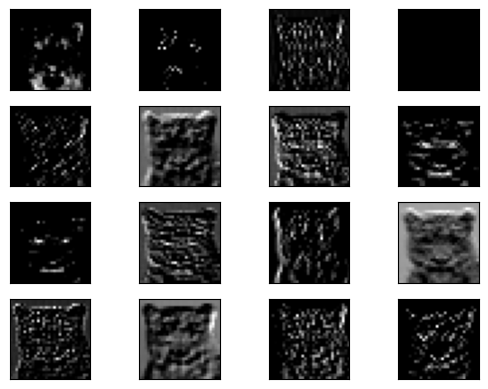

In [34]:
#@title  Witness the visual symphony created by the filters from the first layer of our trained CNN. Each filter extracts a unique facet of reality.

ix = 1
for _ in range(4):
  for _ in range(4):
    if ix > 32:
      break
    # specify subplot and turn of axis
    ax = plt.subplot(4, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
    ix += 1



In [35]:
train_images[1].shape

(32, 32, 3)

In [36]:
filter = filters[:,:,:,2]
filter.shape

(3, 3, 3)

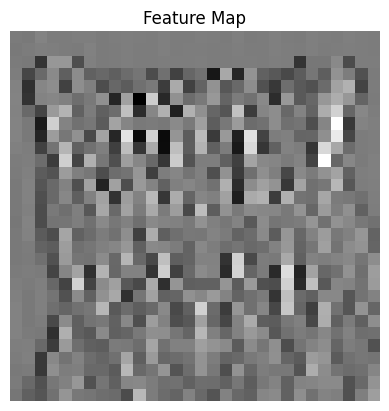

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_images[1] is your input image (32x32x3) and filter has shape (3, 3, 3)
input_image = train_images[1]


# Perform convolution
feature_map = np.zeros((input_image.shape[0] - filter.shape[0] + 1, input_image.shape[1] - filter.shape[1] + 1))

for i in range(feature_map.shape[0]):
    for j in range(feature_map.shape[1]):
        feature_map[i, j] = np.sum(input_image[i:i+filter.shape[0], j:j+filter.shape[1], :] * filter)

# Display the feature map
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map")
plt.axis('off')
plt.show()


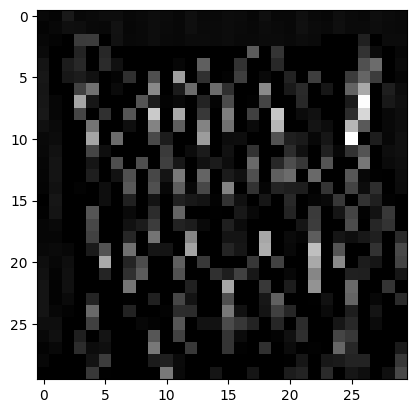

In [38]:
plt.imshow(feature_maps[0, :, :, 2], cmap='gray')

In [39]:
bias = biases[2]
bias

-0.0019434644

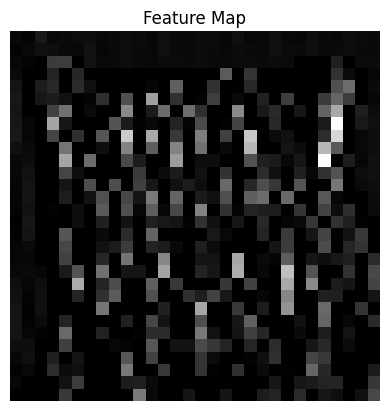

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_images[1] is your input image (32x32x3) and filter has shape (3, 3, 3)
input_image = train_images[1]


# Perform convolution
feature_map = np.zeros((input_image.shape[0] - filter.shape[0] + 1, input_image.shape[1] - filter.shape[1] + 1))

for i in range(feature_map.shape[0]):
    for j in range(feature_map.shape[1]):
        feature_map[i, j] = np.sum(input_image[i:i+filter.shape[0], j:j+filter.shape[1], :] * filter) + bias


# Apply ReLU activation
feature_map[feature_map < 0] = 0

# Display the feature map
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map")
plt.axis('off')
plt.show()


In [41]:
feature_map_tmp = feature_maps[0, :, :, 2]
print(feature_map_tmp.shape)
print(feature_map_tmp[:6,:6])


(30, 30)
[[0.01194364 0.0079477  0.03691563 0.01301266 0.01492859 0.01917942]
 [0.00642436 0.01264407 0.02188446 0.02038258 0.01427445 0.0120719 ]
 [0.01032575 0.00677008 0.         0.08653205 0.08776424 0.        ]
 [0.01531943 0.         0.         0.05141538 0.         0.05790532]
 [0.03040458 0.         0.04086214 0.05917915 0.         0.06324998]
 [0.0339747  0.         0.0336235  0.0413572  0.02525132 0.        ]]


In [42]:
print(feature_map.shape)
print(feature_map[:6,:6])

(30, 30)
[[0.01194355 0.00794769 0.03691566 0.01301271 0.0149286  0.01917942]
 [0.0064244  0.01264404 0.02188449 0.02038254 0.0142745  0.01207187]
 [0.01032572 0.00677006 0.         0.08653208 0.0877643  0.        ]
 [0.01531943 0.         0.         0.05141537 0.         0.05790534]
 [0.03040465 0.         0.04086217 0.05917915 0.         0.06325   ]
 [0.03397474 0.         0.03362348 0.04135719 0.02525133 0.        ]]




<br><br><br><br><br><br>

---
#<font color='SeaGreen'>Image classification with Multilayer perceptron</font> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/250px-Colored_neural_network.svg.png" width=150 height=150>






<br><br>

---
###<font color='SeaGreen'>Step 2. Model. Multilayer perceptron</font>

In [43]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32,3)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
#@title Let's display the architecture of  model:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          98,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,418 (427.41 KB)

 Trainable params: 109,418 (427.41 KB)

 Non-trainable params: 0 (0.00 B)



<br><br>

---
###<font color='SeaGreen'>Step 3. Train and evaluate the model</font>

In [45]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4979 - loss: 1.0757 - val_accuracy: 0.6967 - val_loss: 0.6918
Epoch 2/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7209 - loss: 0.6652 - val_accuracy: 0.6993 - val_loss: 0.7032
Epoch 3/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7622 - loss: 0.5936 - val_accuracy: 0.7687 - val_loss: 0.5638
Epoch 4/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7781 - loss: 0.5487 - val_accuracy: 0.7567 - val_loss: 0.5764
Epoch 5/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7981 - loss: 0.5188 - val_accuracy: 0.7820 - val_loss: 0.5279


####<font color='SeaGreen'>Evaluate the model</font>



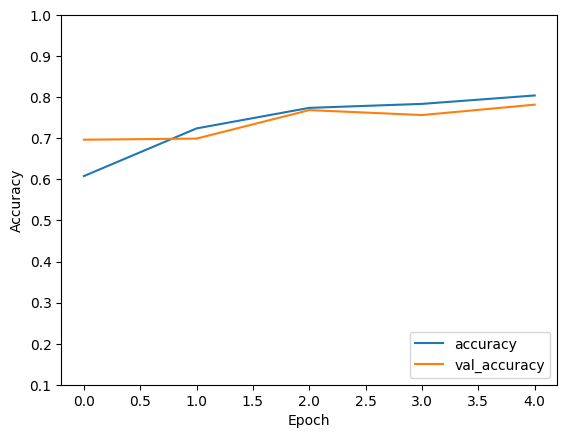

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')



In [47]:
#@title We've attempted a simple neural network, but it only achieved 40% accuracy, demonstrating the inefficiency of such basic models"

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

47/47 - 0s - 2ms/step - accuracy: 0.7820 - loss: 0.5279
0.7820000052452087
